NAMA : CHRISTHOFER LAURENT JULIANT

*   KELAS: IF-43-03
*   NIM  : 1301190379 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from os import path
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
!gdown --id 1J4RyqZFPFG9tm628JZUz9AIdiWQ-h_EZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1J4RyqZFPFG9tm628JZUz9AIdiWQ-h_EZ
To: /content/beer_data_set.csv
100% 413k/413k [00:00<00:00, 122MB/s]


In [ ]:
df_beer = pd.read_csv('beer_data_set.csv')
df_beer.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251.0,Altbier,8.0,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25.0,50.0,...,32.0,9.0,47.0,74.0,33.0,0.0,33.0,57.0,8.0,111
1,Double Bag,252.0,Altbier,8.0,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25.0,50.0,...,57.0,18.0,33.0,55.0,16.0,0.0,24.0,35.0,12.0,84
2,Long Trail Ale,253.0,Altbier,8.0,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25.0,50.0,...,37.0,6.0,42.0,43.0,11.0,0.0,10.0,54.0,4.0,62
3,Doppelsticke,254.0,Altbier,8.0,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25.0,50.0,...,55.0,31.0,47.0,101.0,18.0,1.0,49.0,40.0,16.0,119
4,Scurry,255.0,Altbier,8.0,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25.0,50.0,...,69.0,10.0,63.0,120.0,14.0,0.0,19.0,36.0,15.0,218


In [ ]:
df_beer.shape

(5558, 21)

In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df_beer.shape[0],df_beer.shape[1]))

print("There are {} types of beer in this dataset such as {}... \n".format(len(df_beer.Name.unique()), 
                                                                           ", ".join(df_beer.Name.unique()[0:5])))

print("There are {} breweries serving beer in this dataset such as {}... \n".format(len(df_beer.Brewery		.unique()), 
                                                                                      ", ".join(df_beer.Brewery		.unique()[0:5])))

There are 5558 observations and 21 features in this dataset. 

There are 976 types of beer in this dataset such as Amber, Double Bag, Long Trail Ale, Doppelsticke, Scurry... 

There are 576 breweries serving beer in this dataset such as Alaskan Brewing Co., Long Trail Brewing Co., Uerige Obergärige Hausbrauerei, Off Color Brewing, Ninkasi Brewing Company... 



In [ ]:
df_beer[["Brewery", "Style","Ave Rating"]].head(10)

,Brewery,Style,Ave Rating
0,Alaskan Brewing Co.,Altbier,3.65
1,Long Trail Brewing Co.,Altbier,3.90
2,Long Trail Brewing Co.,Altbier,3.58
3,Uerige Obergärige Hausbrauerei,Altbier,4.15
4,Off Color Brewing,Altbier,3.67
5,Ninkasi Brewing Company,Altbier,3.78
6,Uerige Obergärige Hausbrauerei,Altbier,4.10
7,Widmer Brothers Brewing Company,Altbier,3.46
8,Southampton Publick House,Altbier,3.60
9,The Olde Mecklenburg Brewery,Altbier,4.10


In [ ]:
# Groupby by Beer Name
Name = df_beer.groupby("Name")
Style = df_beer.groupby("Style")

# Summary statistic of all countries
Name.describe().head()

key                                                      \
                  count    mean std     min     25%     50%     75%     max   
Name                                                                          
 Enhanced (Final)   1.0  1066.0 NaN  1066.0  1066.0  1066.0  1066.0  1066.0   
 India Pale Ale     1.0  1761.0 NaN  1761.0  1761.0  1761.0  1761.0  1761.0   
 Schorschbock 31%   1.0    65.0 NaN    65.0    65.0    65.0    65.0    65.0   
 Schorschbock 57%   1.0    75.0 NaN    75.0    75.0    75.0    75.0    75.0   
# 100               1.0  4233.0 NaN  4233.0  4233.0  4233.0  4233.0  4233.0   

                  Style Key        ... Spices       Malty                    \
                      count  mean  ...    75%   max count   mean std    min   
Name                               ...                                        
 Enhanced (Final)       1.0  27.0  ...    0.0   0.0   1.0    5.0 NaN    5.0   
 India Pale Ale         1.0  43.0  ...    0.0   0.0   1.0   23.0 NaN   23.0   
 Schorschbock 31%       1.0   3.0  ...    4.0   4.0   1.0   10.0 NaN   10.0   
 Schorschbock 57%       1.0   3.0  ...    2.0   2.0   1.0    4.0 NaN    4.0   
# 100                   1.0  97.0  ...   15.0  15.0   1.0  113.0 NaN  113.0   

                                               
                     25%    50%    75%    max  
Name                                           
 Enhanced (Final)    5.0    5.0    5.0    5.0  
 India Pale Ale     23.0   23.0   23.0   23.0  
 Schorschbock 31%   10.0   10.0   10.0   10.0  
 Schorschbock 57%    4.0    4.0    4.0    4.0  
# 100              113.0  113.0  113.0  113.0  

[5 rows x 136 columns]

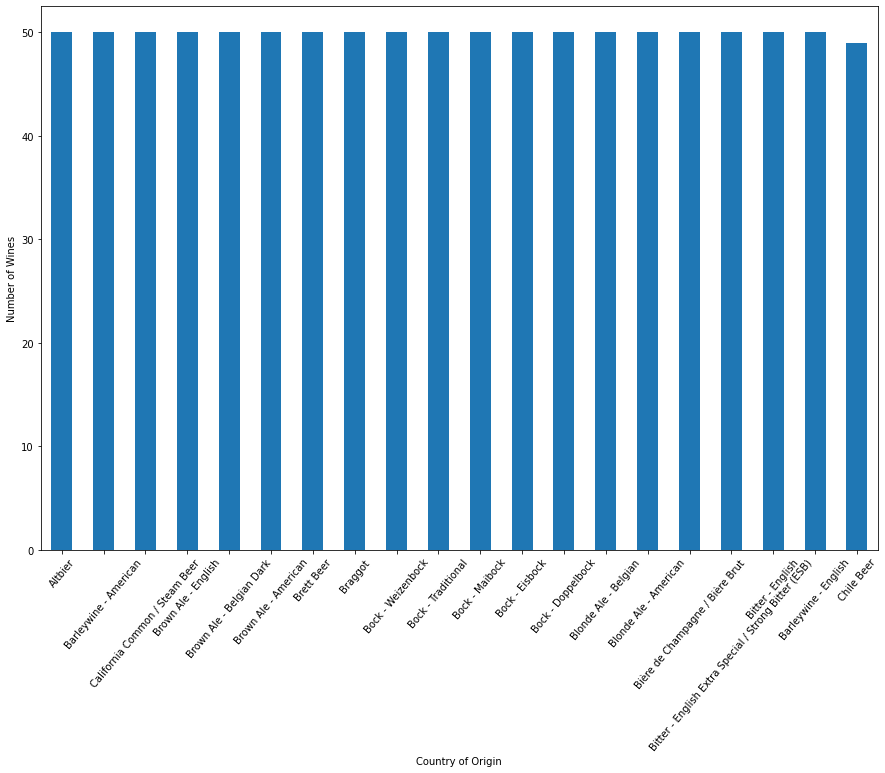

In [ ]:
plt.figure(figsize=(15,10))
Style.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

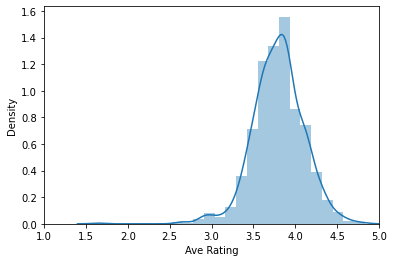

In [ ]:
sns.distplot(df_beer["Ave Rating"], bins=25)
plt.xlim([1,5])
plt.show()

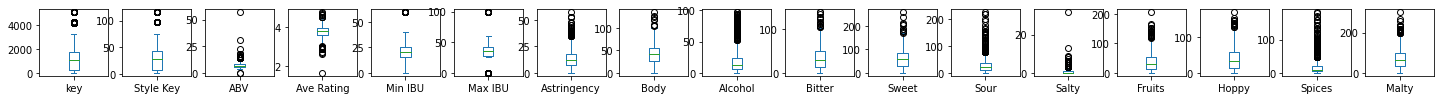

In [ ]:
#cek outliers
df_beer.plot(kind="box", subplots=True, layout=(17,17), sharex=False, sharey=False, figsize=(25,25))
plt.show()

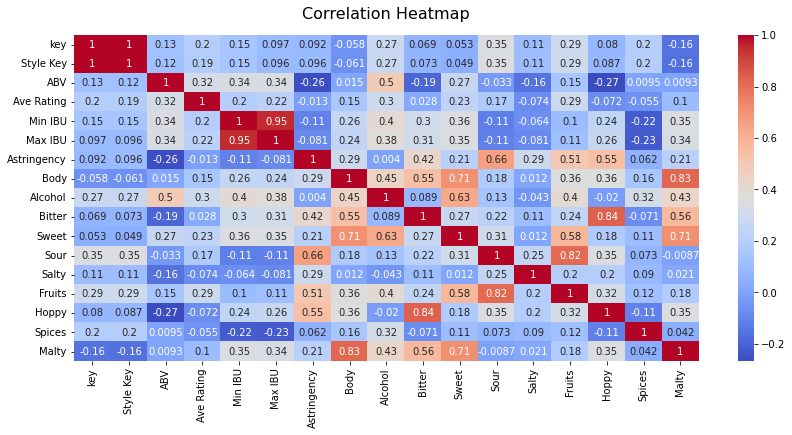

In [ ]:
plt.subplots(figsize=(14,6))
heatmap = sns.heatmap(df_beer.corr(), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

In [ ]:
df_beer["Ave Rating"].describe()

count    999.000000
mean       3.794745
std        0.307992
min        1.630000
25%        3.610000
50%        3.800000
75%        3.975000
max        4.830000
Name: Ave Rating, dtype: float64

In [ ]:
# Best reviews
df_beer[["Name","Ave Rating"]].sort_values("Ave Rating", ascending=False).head(10)

,Name,Ave Rating
499,eisbock,4.83
284,Drone Witch,4.74
142,V.S.O.J.,4.68
696,Devil's Footprint,4.64
113,Aaron,4.63
63,A Deal With The Devil,4.57
71,Great,4.56
101,§ucaba,4.55
100,Bourbon County Brand Barleywine Ale,4.55
292,Brut La Grande,4.52


Eisbock beer and Drone Witch are the highest average rating based on body, alcohol, bitter, sweetness, etc. for the Eisbock beer (4.83) average rating and for the Drone Witch (4.74) average rating.

In [ ]:
# worst reviews
df_beer[["Name","Ave Rating"]].sort_values("Ave Rating").head(10)

,Name,Ave Rating
992,El Lapino,1.63
310,India Pale Ale,2.62
969,Ghost Scorpion Lager,2.65
278,Kasteel Cru Rose,2.70
208,Foster's Special Bitter,2.85
534,Holsten Maibock,2.87
279,Ferme Framboos,2.87
165,Foster's Premium Ale,2.88
553,Michelob AmberBock,2.90
260,Kasteel Cru,2.92


El Lapino and India Pale Ale are the lowest average rating based on body, alcohol, bitter, sweetness, etc. for the El Lapino (1.63) average rating and for the India Pale Ale (2.62) average rating.

### **WORD CLOUD**

WordCloud is a technique to show which words are the most frequent among the given text. The first thing you may want to do before using any functions is check out the docstring of the function, and see all required and optional arguments. To do so, type ?function and run it to get all information.

In [ ]:
?WordCloud

Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.	


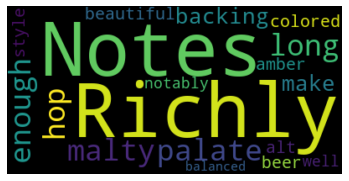

In [ ]:
# Start with one review:
text = df_beer.Description[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

the first review mentioned a lot about Notes, Richly, Malty, Palate, and many more abot the products.

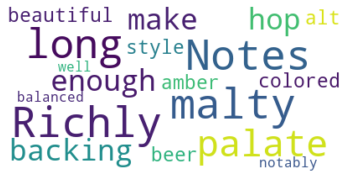

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [ ]:
beer_mask = np.array(Image.open("beer.png"))
beer_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_beer_mask = np.ndarray((beer_mask.shape[0],beer_mask.shape[1]), np.int32)

for i in range(len(beer_mask)):
    transformed_beer_mask[i] = list(map(transform_format, beer_mask[i]))

In [ ]:
transformed_beer_mask.shape

(512, 512)

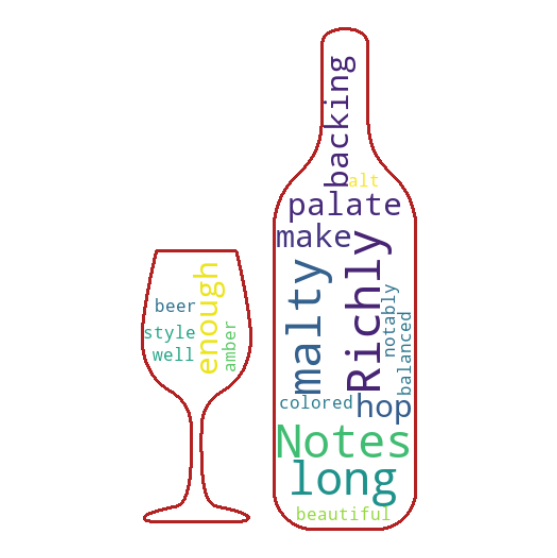

In [ ]:
# Create a word cloud image
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_beer_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("beer.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

a wordcloud in the shape of a beer ! It seems like cream descriptions most often mention about Richly, long, malty, Notes, and way characteristics of the beer.

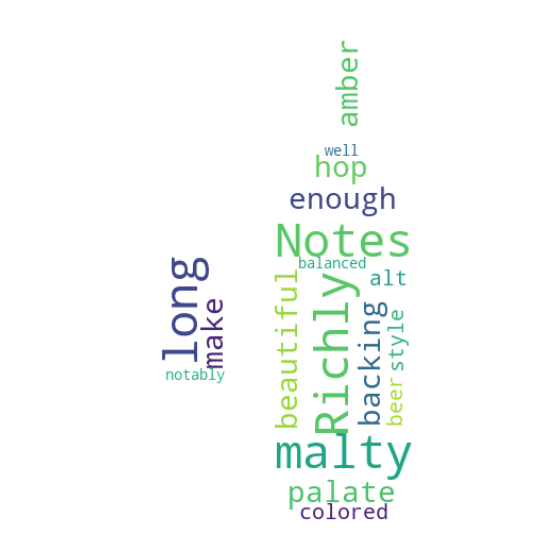

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

mask = np.array(Image.open('beer.png'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=transformed_beer_mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

a wordcloud in the shape of a beer without the border !!! It seems like cream descriptions most often mention about Richly, long, malty, Notes, and way characteristics of the beer.

Creating wordcloud following a color pattern

In [ ]:
Name.size().sort_values(ascending=False).head(10)

Name
Nut Brown Ale    6
Brown Ale        5
Maibock          4
Weizenbock       3
Cabin Fever      2
Christmas Ale    2
Best Bitter      2
Summer Ale       2
Brett IPA        2
Braggot          2
dtype: int64

In [ ]:
Name.size().head(10)

Name
 Enhanced (Final)    1
 India Pale Ale      1
 Schorschbock 31%    1
 Schorschbock 57%    1
# 100                1
't Smisje Blond      1
13 Rebels ESB        1
14* ESB              1
1888                 1
33 Acres Of Life     1
dtype: int64

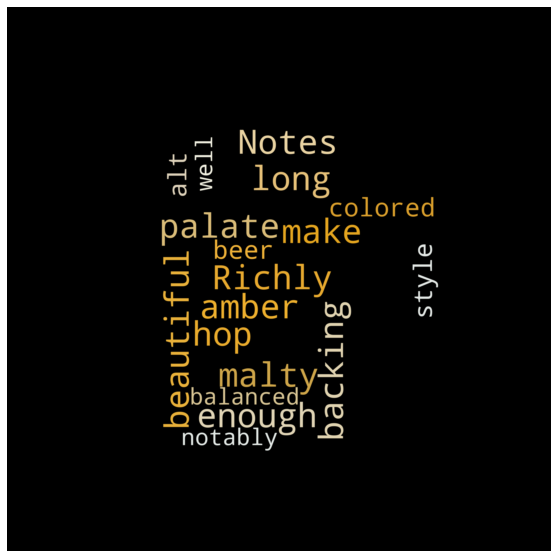

In [ ]:
wordcloud = WordCloud().generate(text)

beerag_mask = np.array(Image.open('beak.png'))
colormap = ImageColorGenerator(beerag_mask)

wc = WordCloud(stopwords=STOPWORDS,
               mask=beerag_mask, 
               contour_color='white',
               background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(text)
wc.recolor(color_func=colormap)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# store to file
plt.savefig("beeragProducts.png", format="png")
plt.show()

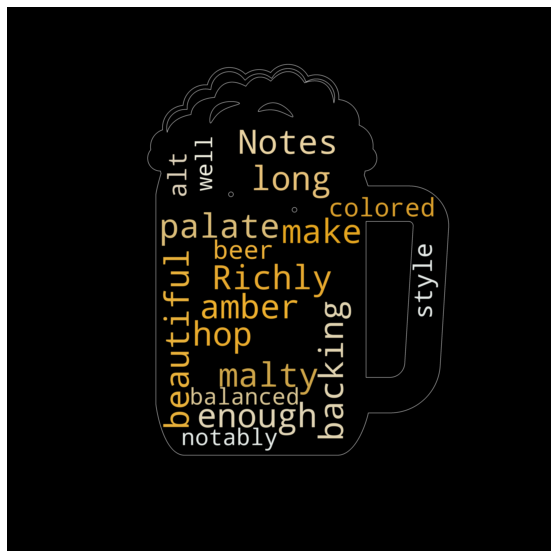

In [ ]:
wordcloud = WordCloud().generate(text)

beerag_mask = np.array(Image.open('beak.png'))
colormap = ImageColorGenerator(beerag_mask)

wc = WordCloud(stopwords=STOPWORDS,
               mask=beerag_mask, 
               contour_width=3, contour_color='white',
               background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(text)
wc.recolor(color_func=colormap)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# store to file
plt.savefig("beeragProducts.png", format="png")
plt.show()

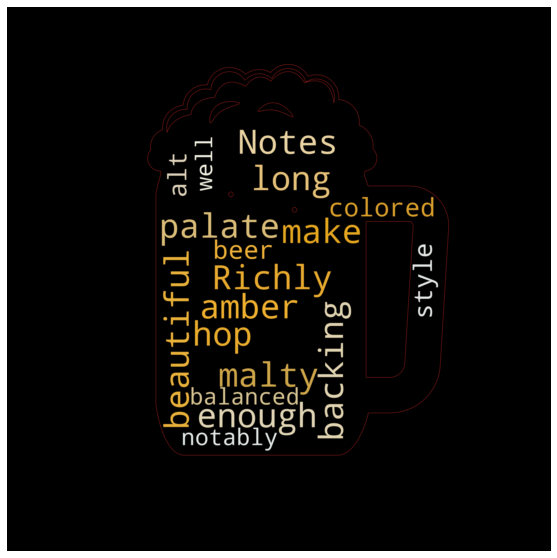

In [ ]:
wordcloud = WordCloud().generate(text)

beerag_mask = np.array(Image.open('beak.png'))
colormap = ImageColorGenerator(beerag_mask)

wc = WordCloud(stopwords=STOPWORDS,
               mask=beerag_mask, 
               contour_width=3, contour_color='firebrick',
               background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(text)
wc.recolor(color_func=colormap)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# store to file
plt.savefig("beeragProducts.png", format="png")
plt.show()